In [23]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib
import time
import pickle
import os

In [24]:
from multioutput_functions import *

In [25]:
singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/singles_230801.h5')
singles.drop(['OLD_SPT','MKO_J', 'MKO_H', 'MKO_K', '2MASS_J', '2MASS_H', '2MASS_KS','NAME'],axis=1,inplace=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0
...,...,...,...,...,...
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0
1045,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0
1046,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0
1047,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0


In [26]:
singles = singles[~singles['SPT'].isin(['T8.0', 'T9.0'])].reset_index(drop=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0
...,...,...,...,...,...
1030,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3339582236326406e-13, 2.1644375443831028e-1...","[5.454448342911412e-14, 5.148174410306434e-14,...",30.942905,T7.0
1031,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4735645626250398e-13, 2.3242165483576034e-1...","[1.1625706373890936e-13, 1.1864019563362871e-1...",18.344790,T6.0
1032,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2321663483693873e-13, 2.1817237604086632e-1...","[8.641283148800903e-14, 8.18787297841606e-14, ...",23.117058,T7.0
1033,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.9716155345980114e-14, 1.5132954446164176e-1...","[6.702337007799281e-14, 6.597687923192873e-14,...",25.810495,T6.0


In [5]:
typenum=[]
for i in range(len(singles)):
    typenum.append(typeToNum(singles['SPT'][i]))
singles['SPT_NUM']=typenum
singles = singles.loc[singles['SPT_NUM']>15*np.ones(len(singles))]
singles = singles.reset_index(drop=True)

In [6]:
singles = singles.sort_values(by=['SPT_NUM','J_SNR'], ascending=[True,False])

In [7]:
Msingles = singles[singles.SPT_NUM<20].reset_index(drop=True)
Lsingles = singles[(singles.SPT_NUM>19)&(singles.SPT_NUM<30)].reset_index(drop=True)
Tsingles = singles[singles.SPT_NUM>29].reset_index(drop=True)

In [17]:
unique(Msingles.SPT)
unique(Tsingles.SPT)

['T0.0', 'T1.0', 'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0']

In [21]:
max(singles.J_SNR)

1026.8839111328125

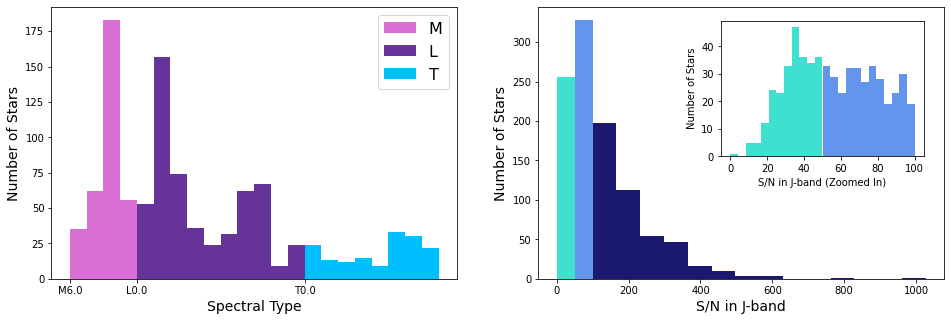

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
# Define spectral type labels and colors
Mspt = unique(Msingles.SPT)
Lspt = unique(Lsingles.SPT)
Tspt = unique(Tsingles.SPT)

# Create a histogram for each spectral type
for spt in Mspt:
    if spt==Mspt[0]:
        ax[0].hist(Msingles[Msingles['SPT'] == spt]['SPT'], bins=1, align='right', rwidth=1, color='orchid', label='M')
        continue    
    ax[0].hist(Msingles[Msingles['SPT'] == spt]['SPT'], bins=1, align='right', rwidth=1, color='orchid')
for spt in Lspt:
    if spt==Lspt[0]:
        ax[0].hist(Lsingles[Lsingles['SPT'] == spt]['SPT'], bins=1, align='right', rwidth=1, color='rebeccapurple', label='L')
        continue
    ax[0].hist(Lsingles[Lsingles['SPT'] == spt]['SPT'], bins=1, align='right', rwidth=1, color='rebeccapurple')
for spt in Tspt:
    if spt==Tspt[0]:
        ax[0].hist(Tsingles[Tsingles['SPT'] == spt]['SPT'], bins=1, align='right', rwidth=1, color='deepskyblue', label='T')
        continue
    ax[0].hist(Tsingles[Tsingles['SPT'] == spt]['SPT'], bins=1, align='right', rwidth=1, color='deepskyblue')

ax[0].set_xticks(['M6.0', 'L0.0', 'T0.0'])

# Set x-axis labels and title
ax[0].set_xlabel('Spectral Type', size=14)
ax[0].set_ylabel('Number of Stars', size=14)
ax[0].legend(fontsize=16)
# ax[0].set_title('Histogram of Spectral Types', size=15)

# Create histogram for S/N in J-band in ax[1]
ax[1].hist(singles.J_SNR[singles['J_SNR'] > 100],color='midnightblue',bins=14)
ax[1].hist(singles[(singles['J_SNR'] <= 100)&(singles['J_SNR'] >= 50)]['J_SNR'], color='cornflowerblue',bins=1)
ax[1].hist(singles[singles['J_SNR'] < 50]['J_SNR'], color='turquoise',bins=1)
ax[1].set_xlabel('S/N in J-band', size=14)
ax[1].set_ylabel('Number of Stars', size=14)
# ax[1].set_title('S/N Distribution', size=15)

# Create inset axes for the zoomed-in histogram
axins = ax[1].inset_axes([0.45, 0.45, 0.5, 0.5])
axins.hist(singles[singles['J_SNR'] < 50]['J_SNR'], color='turquoise',bins=12)
axins.hist(singles[(singles['J_SNR'] <= 100)&(singles['J_SNR'] >= 50)]['J_SNR'], color='cornflowerblue',bins=12)
axins.set_xlabel('S/N in J-band (Zoomed In)', size=10)
axins.set_ylabel('Number of Stars', size=10)
# axins.set_title('Zoomed S/N Distribution', size=11)

plt.savefig('paperfigures/spt_snr_dist',facecolor='white')

In [22]:
# fig,ax = plt.subplots(1,2,figsize=(16,5))
# ax[0].hist(singles.SPT,bins=12)
# ax[0].set_xticks(['M6.0','M8.0','L0.0','L2.0','L4.0','L6.0','L8.0','T0.0','T2.0','T4.0','T6.0','T8.0'], size=13)
# ax[0].set_xlabel('Spectral Type', size=14)
# ax[0].set_ylabel('Frrequency', size=14)
# ax[0].set_title('Spectral Type Distribution', size=15)
# ax[1].hist(singles.J_SNR)
# ax[1].set_xlabel('S/N in J-band', size=14)
# ax[1].set_ylabel('Frrequency', size=14)
# ax[1].set_title('S/N Distribution', size=15)
# plt.savefig('paperfigures/spt_snr_dist',facecolor='white')

In [14]:
with open('data/BinDF_low.pickle', 'rb') as f:
        BinDF_low = pickle.load(f)

In [17]:
BinDF_low[(BinDF_low.primary_type==17)&(BinDF_low.secondary_type==24)]

,system_interpolated_flux,system_interpolated_noise,primary_type,secondary_type,J_SNR,SNR_CLASS,WAVE,flux_0,flux_1,flux_2,...,flux_399,flux_400,flux_401,flux_402,flux_403,flux_404,flux_405,flux_406,flux_407,flux_408
6200,"[0.683410895929109, 0.7436930746634676, 0.6423...","[0.018399337147666, 0.05334148778429702, 0.060...",17,24,24.053795,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",0.683411,0.743693,0.642357,...,0.166568,0.233773,0.171408,0.143109,0.182543,0.137606,0.166659,0.170794,0.164294,0.170523
6201,"[0.6168475527550374, 0.5872125668638148, 0.485...","[0.22408423656784118, 0.754220275359667, 0.958...",17,24,9.033993,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",0.616848,0.587213,0.485533,...,0.291524,0.325441,0.279833,0.001634,0.435146,-0.066857,0.221529,0.229724,0.262960,-0.049297
6202,"[-0.7424701838214458, 0.7802520763767152, 0.02...","[0.7827673752046626, 0.7889718615862358, 0.753...",17,24,1.863955,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",-0.742470,0.780252,0.023111,...,0.330402,0.403140,0.287422,0.101608,-0.017484,-0.050363,-0.241437,0.258897,0.524662,0.249527
6203,"[0.6252597755974394, 0.7027203806767361, 0.768...","[0.09185749130288805, 0.08892794176984008, 0.0...",17,24,19.357363,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",0.625260,0.702720,0.768084,...,0.221253,0.175852,0.163590,0.249167,0.216330,0.237910,0.135671,0.145376,0.214314,0.181088
6204,"[1.266604396935306, 0.8170326540797389, 0.6587...","[0.25419865428188076, 0.07058687871215778, 0.0...",17,24,12.828468,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",1.266604,0.817033,0.658723,...,0.255694,0.255829,0.223211,0.215393,0.209498,0.374832,0.156234,0.154484,0.172138,0.264691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,"[0.7699904130030877, 0.7755564563630142, 0.792...","[0.02945913037440267, 0.008864818790711618, 0....",17,24,44.822284,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",0.769990,0.775556,0.792513,...,0.207528,0.226624,0.205179,0.182060,0.210671,0.177271,0.199182,0.202586,0.177328,0.199995
6396,"[0.6491517509606667, 0.6002955424663119, 0.641...","[0.03027275147962257, 0.030453521262950038, 0....",17,24,43.836725,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",0.649152,0.600296,0.641750,...,0.233357,0.249825,0.226566,0.212930,0.248701,0.206587,0.267791,0.199826,0.231409,0.229202
6397,"[1.897781619307184, 0.3188898791275329, 1.0103...","[0.5944543922656322, 0.5953131468779466, 0.584...",17,24,2.471683,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",1.897782,0.318890,1.010392,...,0.136422,-0.187966,0.274299,0.188250,0.346796,-0.016018,0.224015,0.012422,0.413970,0.191719
6398,"[1.0733346149830116, 0.7762799910264301, 1.106...","[0.20758514870572692, 0.21262964724606917, 0.2...",17,24,9.271070,low,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",1.073335,0.776280,1.106018,...,0.258381,0.203497,0.271990,0.241556,0.384963,0.096780,0.118228,0.262485,0.160259,0.338973


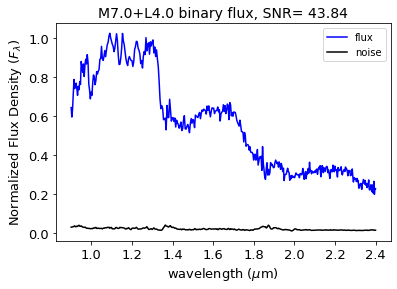

In [135]:
ii = 6396
flux = BinDF_low.system_interpolated_flux[ii]
unc  = BinDF_low.system_interpolated_noise[ii]
wave = BinDF_low.WAVE[ii]
nflux, nunc = normalize(wave, flux, unc)
plt.plot(wave,nflux,c='b',label='flux')
plt.plot(wave,nunc,c='k',label='noise')
plt.xlabel('wavelength ($\\mu$m)', size=13)
plt.ylabel('Normalized Flux Density ($F_\\lambda$)', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.legend()
plt.title('M7.0+L4.0 binary flux, SNR= {snr:.2f}'.format(snr=BinDF_low.J_SNR[ii]), size=14)
plt.savefig('paperfigures/ex_binary_variednoise',facecolor='white')

In [27]:
with open('data/SinDF_hig.pickle', 'rb') as f:
        SinDF_hig=pickle.load(f)

Type= M6.0, SNR= 109.89


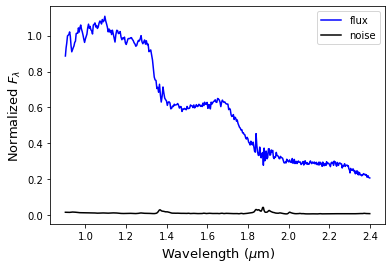

In [49]:
ii=2000
flux = SinDF_hig.system_interpolated_flux[ii]
unc  = SinDF_hig.system_interpolated_noise[ii]
nflux, nunc = normalize(wavegrid, flux, unc)
plt.plot(wavegrid,nflux,c='b',label='flux')
plt.plot(wavegrid,nunc,c='k',label='noise')
plt.xlabel('Wavelength ($\\mu$m)', size=13)
plt.ylabel('Normalized $F_\\lambda$', size=13)
plt.legend()
print('Type= {type:}, SNR= {snr:.2f}'.format(type=SinDF_hig.SPT[ii],snr=SinDF_hig.J_SNR[ii]))
plt.savefig('paperfigures/ex_single_variednoise',facecolor='white')